<a id='Top of Page'><a/>

# Forecasts and Predictions Project

The goal of this project is to analyze the user churn data of the gym Model Fitness and come up with a customer retention strategy. I accomplish this by: learning to predict the probability of churn (for the upcoming month) for each customer, drawing up typical user portraits and selecting the most outstanding groups (also describing their features), analyzing the factors that impact churn most and lastly by drawing basic conclusions and developing recommendations on how to improve customer service through identifying target groups, suggesting measures to cut churn and describing any other potential patterns in regards to customer interaction. 

The project will progress according to the following steps: first downloading the data, second by carrying out exploratory data analysis, third by building a model to predict customer churn, fourth by creating user clusters, and lastly coming up with conclusions and basic recommendations on working with customers.

Table of Contents:

<a href='#Step 1. Download the data'>Step 1. Download the data</a>

<a href='#Step 2. Carry out exploratory data analysis (EDA)'>Step 2. Carry out exploratory data analysis (EDA)</a>

<a href='#Step 3. Build a model to predict user churn'>Step 3. Build a model to predict user churn</a>

<a href='#Step 4. Create user clusters'>Step 4. Create user clusters</a>

<a href='#Step 5. Come up with conclusions and basic recommendations on working with customers'>Step 5. Come up with conclusions and basic recommendations on working with customers</a>

<a id='Step 1. Download the data'></a>

## Step 1. Download the data

In [1]:
#data preprocessing and upload
#import libraries necessary for the first two steps
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/Users/conradschreiner/opt/anaconda3/envs/practicum/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
try:
    churn_data = pd.read_csv('/Users/conradschreiner/datasets/gym_churn_us.csv')
except:
    churn_data = pd.read_csv('/datasets/gym_churn_us.csv')

<a id='Step 2. Carry out exploratory data analysis (EDA)'></a>

## Step 2. Carry out exploratory data analysis (EDA)

The main goal of this step is to prepare the data for the creation of the model in the next step. I will being by preprocessing the data and viewing the general information regarding it. Next I will move on to checking if the data contains any missing values, then I will study the mean values and standard deviation using the describe() method. After that I will look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method). Then I will plot bar histograms and feature distributions for those who left (churn) and those who stayed. Lasly I will build a correlation matrix and display it using a heatmap from the Seaborn library.

In [3]:
#checking general information on the data
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
#viewing first five rows
churn_data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
#checking the overall size and dimensions
churn_data.shape

(4000, 14)

### Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the describe() method)

In [6]:
#checking for missing values
churn_data.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

Good news, no missing values!

In [7]:
#How many people stayed versus how many people churned?
churn_data['Churn'].value_counts()

0    2939
1    1061
Name: Churn, dtype: int64

In [8]:
#Studying the mean values and standard deviation
churn_data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


According to the mean and standard deviation, the gender distribution appears to be around 50/50. The average contract period (Month_to_end_contract) for users appears to be between 4 and 5 months, in between the contract options offered by the gym of 3 and 6 months. So overall in regards to contract period, it appears that users are cautious to long term commitment. The average appears to be around 29. Average additional charges is at 146.94, it will be interesting to see how this varies between those who left and those who stayed. Average churn is around 26%, which means that around 74% of users continue using the gym whereas 26% leave. Now let's ove on to a more indepth view of the churn rate. 

### Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method)

In [9]:
#calculating the mean feature values in the to groups based on churn: those who left (1) and those who stayed (0)
churn_grouped = churn_data.groupby(['Churn']).mean()
display(churn_grouped)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [10]:
#creating dataset of users who left or "churned"
churn_left = churn_data.query('Churn == 1')
churn_left.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
11,1,1,1,0,1,1,0,27,266.783824,1.0,2,2.348535,1.584316,1
13,1,1,0,0,1,1,1,27,152.748668,1.0,1,0.000000,0.000000,1
21,0,0,0,0,1,1,0,30,153.198594,1.0,3,0.636382,0.000000,1
23,1,1,0,0,1,1,1,32,276.079882,1.0,1,1.420637,1.043101,1


In [11]:
churn_left.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.0
mean,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546,1.0
std,0.500118,0.422217,0.478837,0.387495,0.296204,2.132371,0.443448,2.895163,77.696419,1.964593,1.110799,0.694705,0.770237,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,50.629127,1.000000,0.000000,1.010771,0.421337,1.0
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,103.814686,1.000000,1.000000,1.491187,0.979445,1.0
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,29.000000,165.616858,1.000000,1.000000,1.956438,1.588576,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,38.000000,425.535220,12.000000,9.000000,3.478646,3.540271,1.0


In [12]:
#creating dataset of users who stayed or did not churn
churn_stayed = churn_data.query('Churn == 0')
churn_stayed.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [13]:
churn_stayed.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.0
mean,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882,0.0
std,0.499984,0.332933,0.498914,0.478144,0.295040,4.716942,0.498795,3.009933,99.801599,4.363522,3.874780,1.016006,1.018994,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,19.000000,0.171862,1.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,28.000000,76.920993,1.000000,2.000000,1.283137,1.297021,0.0
50%,1.000000,1.000000,1.000000,0.000000,1.000000,6.000000,0.000000,30.000000,149.881171,6.000000,4.000000,2.043252,2.046697,0.0
75%,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,32.000000,224.448274,10.000000,6.000000,2.732944,2.740648,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,0.0


### Plot bar histograms and feature distributions for those who left (churn) and those who stayed

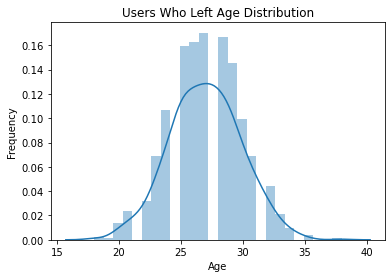

In [14]:
sns.distplot(churn_left['Age'])
plt.title('Users Who Left Age Distribution')
plt.ylabel('Frequency')
plt.show()

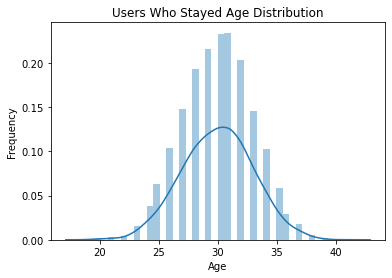

In [15]:
sns.distplot(churn_stayed['Age'])
plt.title('Users Who Stayed Age Distribution')
plt.ylabel('Frequency')
plt.show()

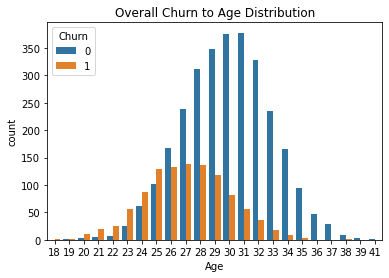

In [16]:
sns.countplot(x='Age', data=churn_data, hue='Churn')
plt.title('Overall Churn to Age Distribution')
plt.show()

In [17]:
churn_data['Age'].value_counts()

29    468
30    457
28    447
31    434
27    378
32    364
26    300
33    253
25    231
34    174
24    148
35     98
23     82
36     48
22     33
37     29
21     24
20     14
38     10
39      3
19      2
18      2
41      1
Name: Age, dtype: int64

Users who stayed appear to be slightly older than those who left, by about 5 to 10 years. This could suggest that the gym should market more towards people in their 30s instead of peope in their 20s. The former group has a higher potential for longer term commitment, growth and sustainability. 

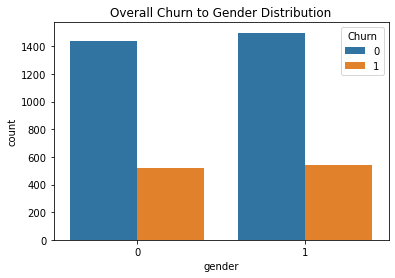

In [18]:
sns.countplot(x='gender', data=churn_data, hue='Churn')
plt.title('Overall Churn to Gender Distribution')
plt.show()

Gender appears to not have a significant impact on churn. The distribution for both gender "0" and gender "1" are nearly identical.

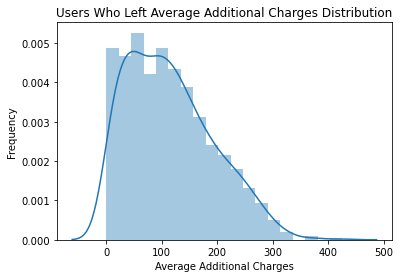

In [19]:
sns.distplot(churn_left['Avg_additional_charges_total'])
plt.title('Users Who Left Average Additional Charges Distribution')
plt.ylabel('Frequency')
plt.xlabel('Average Additional Charges')
plt.show()

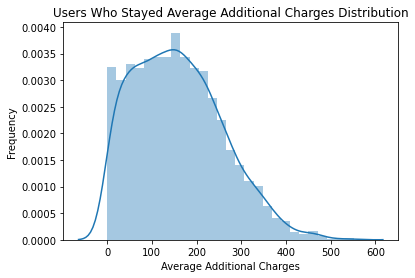

In [20]:
sns.distplot(churn_stayed['Avg_additional_charges_total'])
plt.title('Users Who Stayed Average Additional Charges Distribution')
plt.ylabel('Frequency')
plt.xlabel('Average Additional Charges')
plt.show()

Users who stayed have slightly higher average additional charges per month. Perhaps this could be because the users who stayed paid for more of the gym's services, and therefore had a better overall experience. 

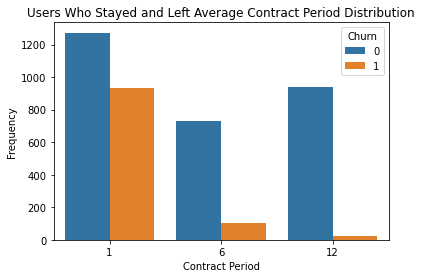

In [21]:
sns.countplot(x='Contract_period', data=churn_data, hue='Churn')
plt.title('Users Who Stayed and Left Average Contract Period Distribution')
plt.xlabel('Contract Period')
plt.ylabel('Frequency')
plt.show()

Users who stayed had a much higher frequency of longer term contract plans, 6 or 12 months, compared to the users who left. However it should be noted that the 1 and 3 month contracts were the most popular across both groups.

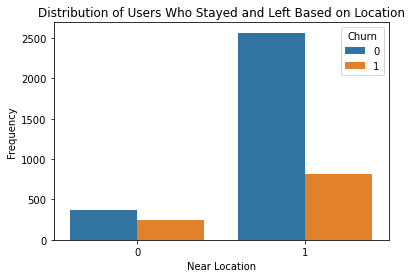

In [22]:
sns.countplot(x='Near_Location', data=churn_data, hue='Churn')
plt.title('Distribution of Users Who Stayed and Left Based on Location')
plt.xlabel('Near Location')
plt.ylabel('Frequency')
plt.show()

Most users in both groups tend to live near the gym, but it appears that more users who stayed live near the gym comapred to those who left.

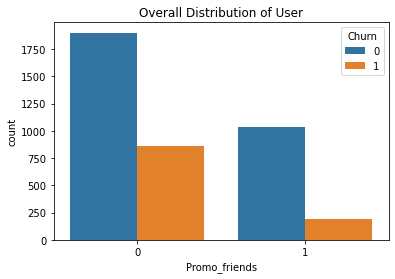

In [23]:
sns.countplot(x='Promo_friends', data=churn_data, hue='Churn')
plt.title('Overall Distribution of User')
plt.show()

Overall it appears that the friends promo had similar proportions for people who churned vs people who stayed. Although it should be noted that a far great number of people who stayed used a friends promo. So perhaps the promo was successful. 

Lastly for this section I will compare the lifetime numbers for users who left vs users who stayed. Lifetime is the amount of time that the user had maintained a membership.

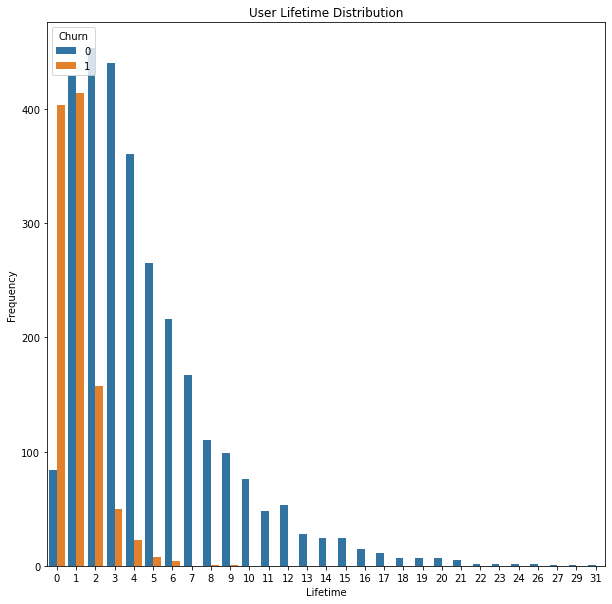

In [24]:
plt.figure(figsize=(10,10))
sns.countplot(x='Lifetime', data=churn_data, hue='Churn')
plt.title('User Lifetime Distribution')
plt.xlabel('Lifetime')
plt.ylabel('Frequency')
plt.show()

Overall users who have maintained a membership for a long period of time tend not to churn. The users most likely to churn are only there for 0, 1 or 2 months after that the churn rate declines rapidly. It appears that the users most likely to leave try the gym out for a month or two and then decide that tey have had enough. 

### Build a correlation matrix and display it

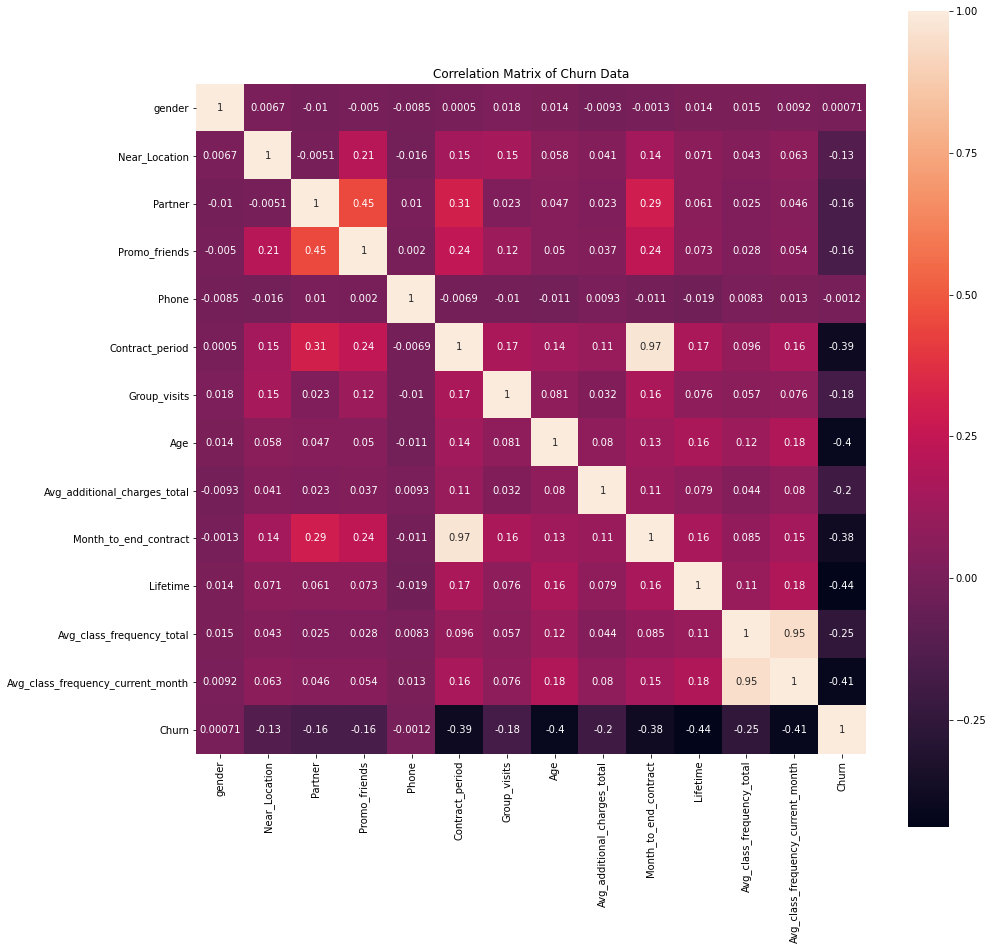

In [25]:
#Next I'm going to create a correlation matrix and plot it using a seaborn heatmap
corr_matrix = churn_data.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix, annot = True, square=True)
plt.title('Correlation Matrix of Churn Data')
plt.show()

<a id='Step 3. Build a model to predict user churn'></a>

## Step 3. Build a model to predict user churn

In this step I will build a binary classification model for customers where the target feature is the user's leaving next month. To begin I'm going to import the necessary libaries and modules, then divide the data into train and validation sets using the train_test_split() function.

In [26]:
#importing all necessary libraries and modules for this step
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

/Users/conradschreiner/opt/anaconda3/envs/practicum/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/Users/conradschreiner/opt/anaconda3/envs/practicum/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/d

In [27]:
#dividing the data into features and a target variable
X = churn_data.drop('Churn', axis = 1)
y = churn_data['Churn']

In [28]:
#dividing the data into train and test sets with a classic 80/20 test_size split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

### Next train the model on the train set with two methods: Logistic Regression and Random Forest

In [29]:
#Logistic Regression
model_LR = LogisticRegression(solver='liblinear') 

model_LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
#forming prediction variable
y_pred_LR = model_LR.predict(X_test) 

In [31]:
#Viewing the prediciton array
display(y_pred_LR)

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,

In [32]:
#Random Forest
model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
y_pred_RF = model_RF.predict(X_test)
display(y_pred_RF)

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,

### Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?

I'll begin with calculating the scores for the Logistic Regression Model. I'm also going to calculate the F1 Score in order to check the harmonization and balance between the test scores for each model.

In [34]:
accuracy_LR = accuracy_score(y_test, y_pred_LR)
precision_LR = precision_score(y_test, y_pred_LR)
recall_LR = recall_score(y_test, y_pred_LR)
f1_LR = f1_score(y_test, y_pred_LR)

print("Logistic Regression Model Accuracy =", round(accuracy_LR, 4))
print("Logistic Regression Model Precision =", round(precision_LR, 4))
print("Logisitic Regression Model Recall =", round(recall_LR, 4))
print("Logistic Regression Model F1 Score =", round(f1_LR, 4))

Logistic Regression Model Accuracy = 0.9262
Logistic Regression Model Precision = 0.8639
Logisitic Regression Model Recall = 0.8333
Logistic Regression Model F1 Score = 0.8483


The logistic regression model metric scores are very encouraging, all around 80 to 90%. Now time time for the Random Tree Classifier.

In [35]:
accuracy_RF = accuracy_score(y_test, y_pred_RF)
precision_RF = precision_score(y_test, y_pred_RF)
recall_RF = recall_score(y_test, y_pred_RF)
f1_RF = f1_score(y_test, y_pred_RF)

print("Random Tree Model Accuracy =", round(accuracy_RF, 4))
print("Random Tree Model Precision =", round(precision_RF, 4))
print("Random Tree Model Recall =", round(recall_RF, 4))
print("Random Tree Model F1 Score =", round(f1_RF, 4))

Random Tree Model Accuracy = 0.9075
Random Tree Model Precision = 0.8523
Random Tree Model Recall = 0.7576
Random Tree Model F1 Score = 0.8021


The random tree classifier model also had good metric scores, but not as good as the logisitic regression model. I will conclude this section by stating the the logisitc regression model is the clear leader in terms of metrics and therefore has better predicitive capabilities for the task at hand.

<a id='Step 4. Create user clusters'><a/>

## Step 4. Create user clusters

In this step I will set aside the column on churn data and identify object (user) clusters. Il'll begin by standardizing the data with SandardScaler() from the sklearn.preprocessing library.

In [36]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
X_sc = scaler.fit_transform(X)

In [37]:
#checking my work
display(X_sc)

array([[ 0.97970588,  0.42788074,  1.02686062, ..., -0.19332863,
        -1.91191971, -1.67847198],
       [-1.0207145 ,  0.42788074, -0.973842  , ...,  0.87368001,
         0.04517569,  0.1360137 ],
       [-1.0207145 ,  0.42788074,  1.02686062, ..., -0.46008079,
        -0.02049263, -0.02901851],
       ...,
       [ 0.97970588,  0.42788074,  1.02686062, ..., -0.46008079,
         0.93313947,  1.01103141],
       [-1.0207145 ,  0.42788074,  1.02686062, ..., -0.19332863,
        -0.25604937, -0.16225246],
       [ 0.97970588, -2.33709981,  1.02686062, ..., -0.72683295,
        -0.79947418, -0.69509885]])

### Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram

In [38]:
#Forming the linkage
from scipy.cluster.hierarchy import dendrogram, linkage 

linked = linkage(X_sc, method = 'ward') 

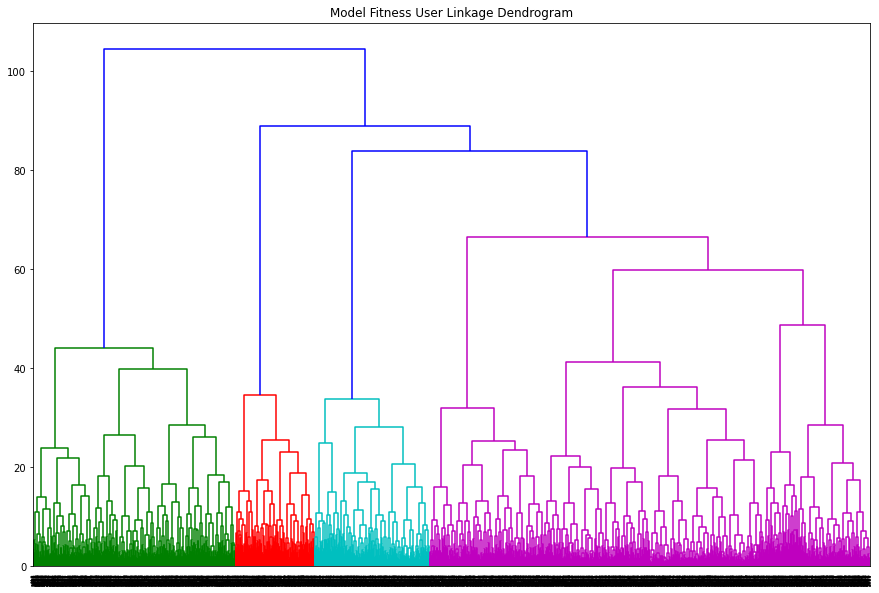

In [39]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Model Fitness User Linkage Dendrogram')
plt.show() 

The dendrogram has been successfully completed and I can now move onto training the clustering model and predicting customer clusters. 

### Train the clustering model with the K-means algorithm and predict customer clusters.

I am moving forward considering that there are 5 clusters based on the previous dendrogram.

In [40]:
#Training the clustering model on the Kmeans Algorithm
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 5, random_state = 0) 
labels = km.fit_predict(X_sc) 

In [41]:
#checking/viewing work
display(labels)

array([1, 0, 3, ..., 0, 0, 1], dtype=int32)

### Look at the mean feature values for clusters. Does anything catch your eye?

In [42]:
churn_data['cluster_km'] = labels
churn_data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster_km
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,1
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,3


In [43]:
cluster_means = churn_data.groupby(['cluster_km']).mean()
display(cluster_means)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100


In [44]:
churn_data.corr()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster_km
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708,0.021401
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098,0.081644
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986,-0.328845
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233,-0.273343
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177,0.245419
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984,-0.712217
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325,-0.087195
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735,-0.069563
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697,-0.036864
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393,-0.704214


In [45]:
churn_data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster_km
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250,2.132250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521,1.497605
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000,4.000000


Upon viewing the mean feature values for the clusters it appears that cluster group 3 has the highest mean churn rate, shortest lifetime, youngest age, and smallest contract period. This is further evidence for my previous observations in the EDA section.

### Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?

In [46]:
cluster_churn_rate = churn_data.groupby(['cluster_km'])['Churn'].value_counts(normalize = True)
display(cluster_churn_rate)

cluster_km  Churn
0           0        0.972305
            1        0.027695
1           0        0.732468
            1        0.267532
2           0        0.556436
            1        0.443564
3           1        0.514263
            0        0.485737
4           0        0.931900
            1        0.068100
Name: Churn, dtype: float64

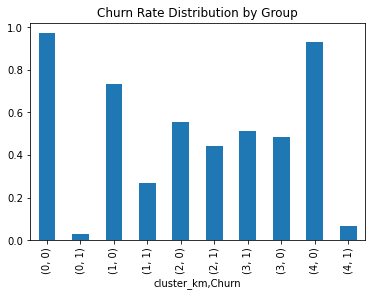

In [47]:
cluster_churn_rate.plot(kind='bar')
plt.title('Churn Rate Distribution by Group')
plt.show()

Cluster groups 0, 1 and 4 have the lowest churn rates, whereas cluster groups 2 and 3 have the highest churn rates. So the former groups are most loyal and the latter are the groups that re most likely to leave. 

### Plot distributions of features for the clusters. Do you notice anything?

In [48]:
churn_data['cluster_km'].value_counts()

3    1262
0    1011
4     837
2     505
1     385
Name: cluster_km, dtype: int64

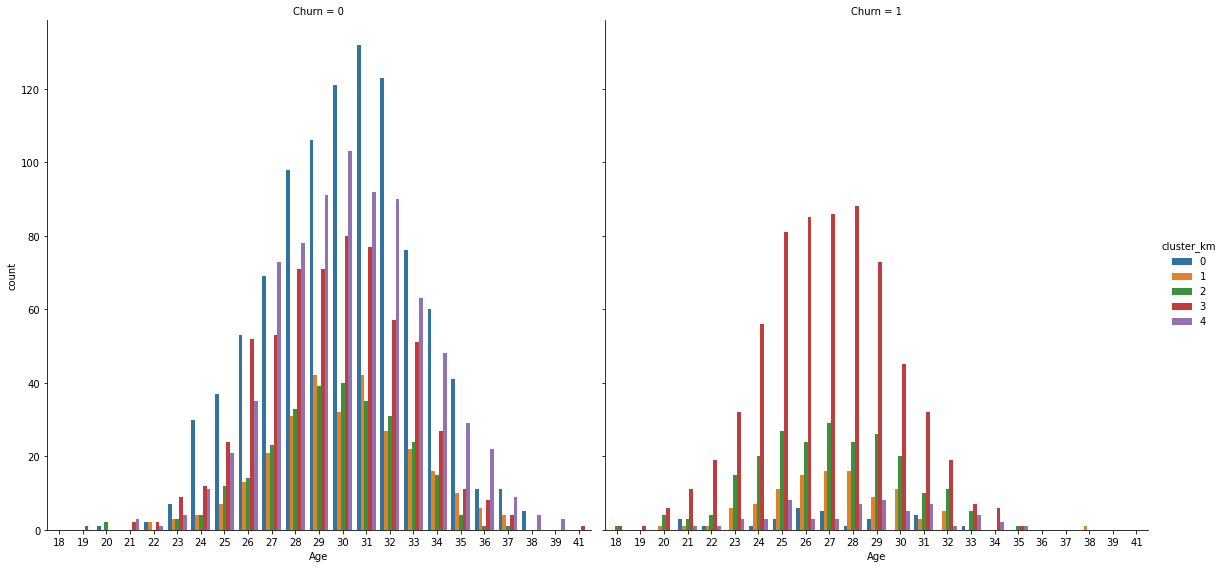

In [49]:
g = sns.catplot(x='Age', data=churn_data, hue='cluster_km', col='Churn', kind='count', height=8)
plt.show()

Based on age it is very apparent that cluster group 0 has a very low churn rate, and tends to my slightly older. Cluster group 3 tends to churn at a higher rate and is slightly younger compared to cluster group 0.

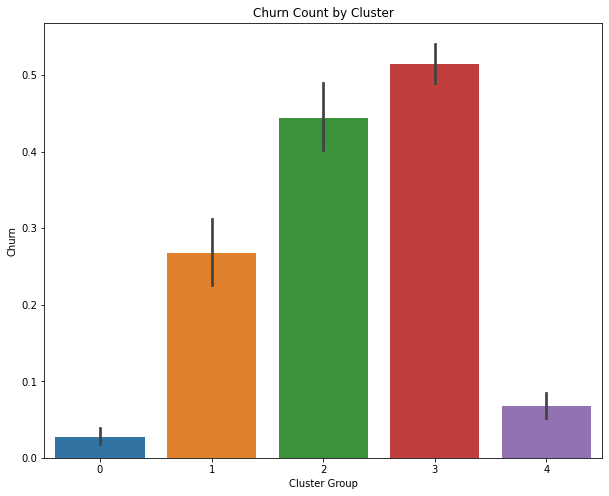

In [50]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x='cluster_km', y='Churn', data=churn_data)
plt.title('Churn Count by Cluster')
plt.xlabel('Cluster Group')
plt.show()

Cluster groups 2 and 3 had the highest churn rates. Let's look at these groups in more detail compared to the rest. It should also be noted that group 3 is also the largest of all the cluster groups, with 0 being the second largest and also the lowest rate of churn.I'm going to compare the feature distrbutions of these two groups specifically to see why one group churned more often than the other.

In [51]:
cluster_group3 = churn_data.query('cluster_km == 3')
cluster_group3.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster_km
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,3
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,3
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1,3
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0,3
11,1,1,1,0,1,1,0,27,266.783824,1.0,2,2.348535,1.584316,1,3


In [52]:
cluster_group0 = churn_data.query('cluster_km == 0')
cluster_group0.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster_km
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,0
15,0,1,1,1,1,12,0,29,101.372604,10.0,4,2.850402,2.836455,0,0
19,1,1,1,1,1,12,1,29,73.917546,11.0,14,1.141327,1.158455,0,0
22,1,1,0,0,1,12,1,29,100.158130,12.0,1,3.899715,3.709855,0,0


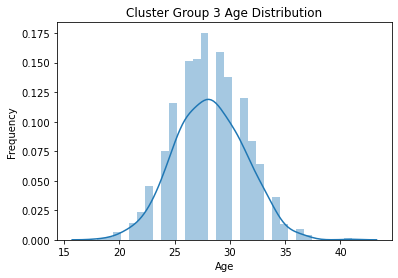

In [53]:
sns.distplot(cluster_group3['Age'])
plt.title('Cluster Group 3 Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

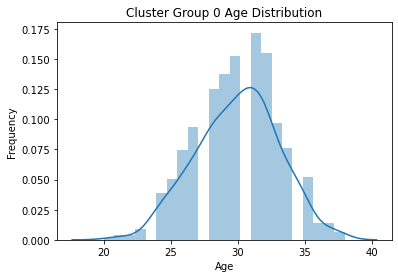

In [54]:
sns.distplot(cluster_group0['Age'])
plt.title('Cluster Group 0 Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

As I theorized earlier in the analysis, the group that has a lower churn rate is slightly older by about 5-10 years. A client base with ages 30-35 would be a more sustainable client base for the gym.

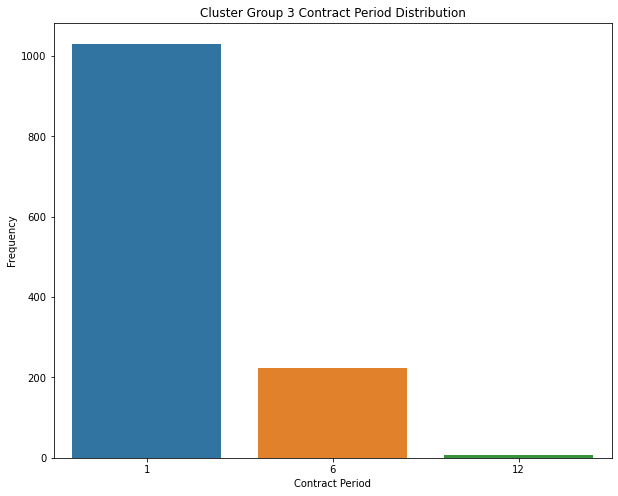

In [55]:
plt.figure(figsize=(10,8))
sns.countplot(x='Contract_period', data=cluster_group3)
plt.title('Cluster Group 3 Contract Period Distribution')
plt.xlabel('Contract Period')
plt.ylabel('Frequency')
plt.show()

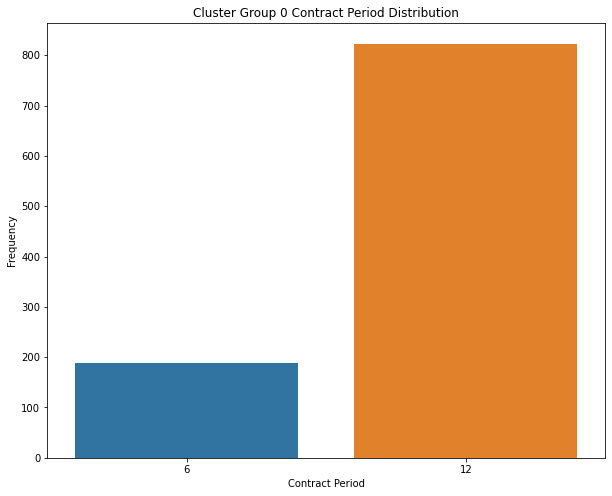

In [56]:
plt.figure(figsize=(10,8))
sns.countplot(x='Contract_period', data=cluster_group0)
plt.title('Cluster Group 0 Contract Period Distribution')
plt.xlabel('Contract Period')
plt.ylabel('Frequency')
plt.show()

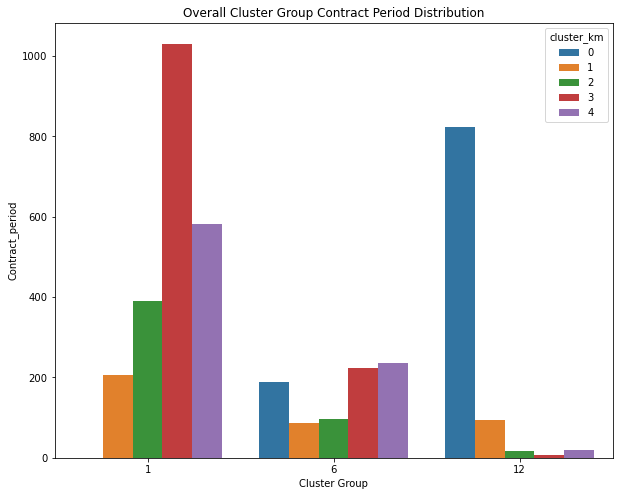

In [57]:
plt.figure(figsize=(10,8))
sns.countplot(x='Contract_period', data=churn_data, hue='cluster_km')
plt.title('Overall Cluster Group Contract Period Distribution')
plt.xlabel('Cluster Group')
plt.ylabel('Contract_period')
plt.show()

Cluster group 0's most common contact period is 12 months, whereas cluster group 3's is 1 month. It appears that cluster group 3 mainly consists of users who try the gym out for 1 month and then leave. Based on this feature I would recommend marketing deals for longer term conracts and avoid 1 month contract offers. If the gym can offer users a good deal on a 12 month contract then they are more likely to stay.

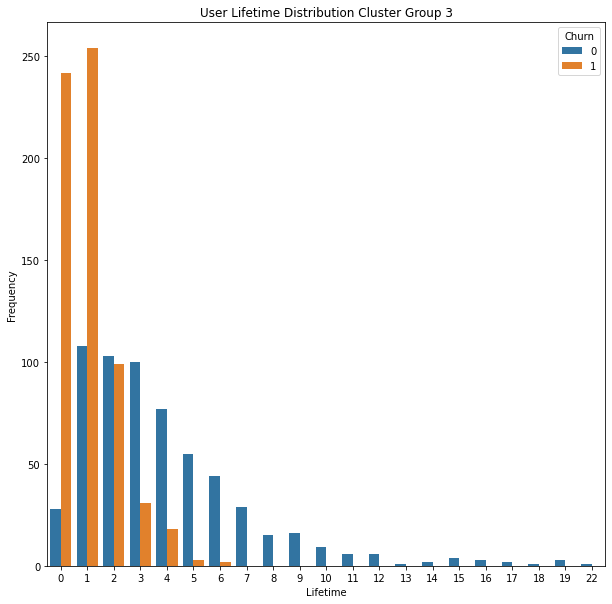

In [58]:
plt.figure(figsize=(10,10))
sns.countplot(x='Lifetime', data=cluster_group3, hue='Churn')
plt.title('User Lifetime Distribution Cluster Group 3')
plt.xlabel('Lifetime')
plt.ylabel('Frequency')
plt.show()

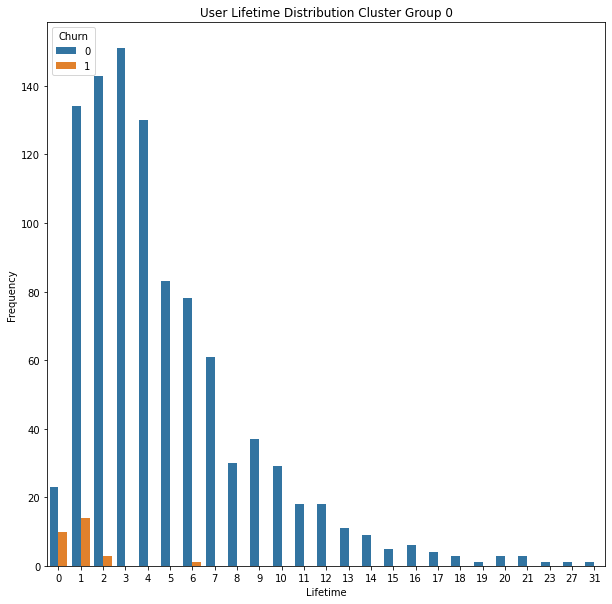

In [59]:
plt.figure(figsize=(10,10))
sns.countplot(x='Lifetime', data=cluster_group0, hue='Churn')
plt.title('User Lifetime Distribution Cluster Group 0')
plt.xlabel('Lifetime')
plt.ylabel('Frequency')
plt.show()

Based on the lifetime distribution it appears that users generally decide whether or not to stay with the gym in the first couple months. A potential good marketing strategy to preventing those new users from churning in the first couple months could be an extra perk. For example, if the user signs up for a 6 or 12 month contract then they get full access to all of the gyms services at no additional charge for the first 3 months. 

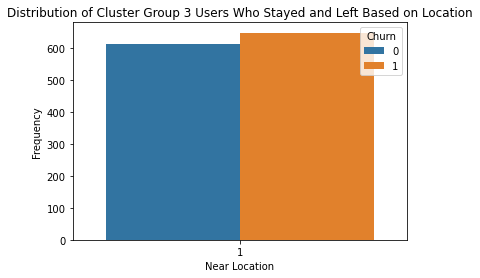

In [60]:
sns.countplot(x='Near_Location', data=cluster_group3, hue='Churn')
plt.title('Distribution of Cluster Group 3 Users Who Stayed and Left Based on Location')
plt.xlabel('Near Location')
plt.ylabel('Frequency')
plt.show()

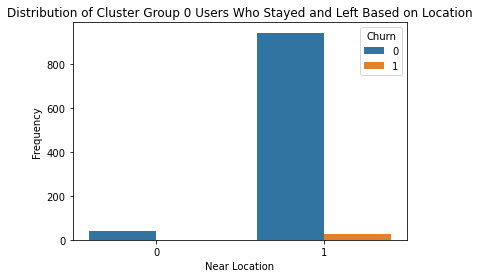

In [61]:
sns.countplot(x='Near_Location', data=cluster_group0, hue='Churn')
plt.title('Distribution of Cluster Group 0 Users Who Stayed and Left Based on Location')
plt.xlabel('Near Location')
plt.ylabel('Frequency')
plt.show()

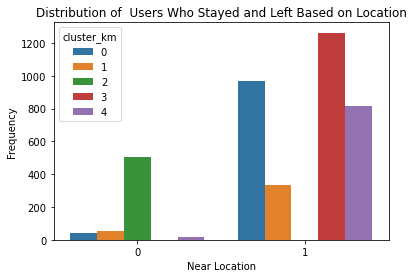

In [62]:
sns.countplot(x='Near_Location', data=churn_data, hue='cluster_km')
plt.title('Distribution of  Users Who Stayed and Left Based on Location')
plt.xlabel('Near Location')
plt.ylabel('Frequency')
plt.show()

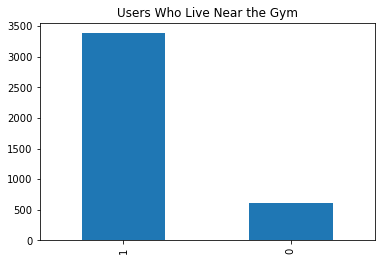

In [63]:
churn_data['Near_Location'].value_counts().plot(kind='bar')
plt.title('Users Who Live Near the Gym')
plt.show()

Near location does not appear to have a significant impact on the churn of the cluster groups. Most users overall tend to live near the gym which makes churn data based on that feature irrelevant.

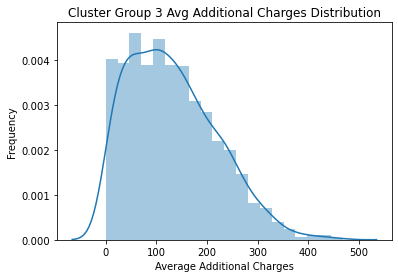

In [64]:
sns.distplot(cluster_group3['Avg_additional_charges_total'])
plt.title('Cluster Group 3 Avg Additional Charges Distribution')
plt.xlabel('Average Additional Charges')
plt.ylabel('Frequency')
plt.show()

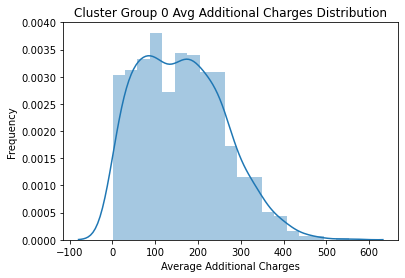

In [65]:
sns.distplot(cluster_group0['Avg_additional_charges_total'])
plt.title('Cluster Group 0 Avg Additional Charges Distribution')
plt.xlabel('Average Additional Charges')
plt.ylabel('Frequency')
plt.show()

Average additional charges does not appear to have an impact on the cluster groups.

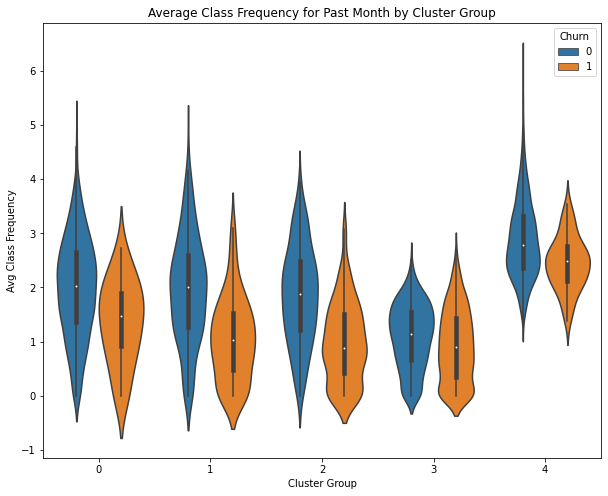

In [66]:
plt.figure(figsize=(10,8))
sns.violinplot(x='cluster_km', y='Avg_class_frequency_current_month', hue='Churn', data=churn_data)
plt.title('Average Class Frequency for Past Month by Cluster Group')
plt.xlabel('Cluster Group')
plt.ylabel('Avg Class Frequency')
plt.show()

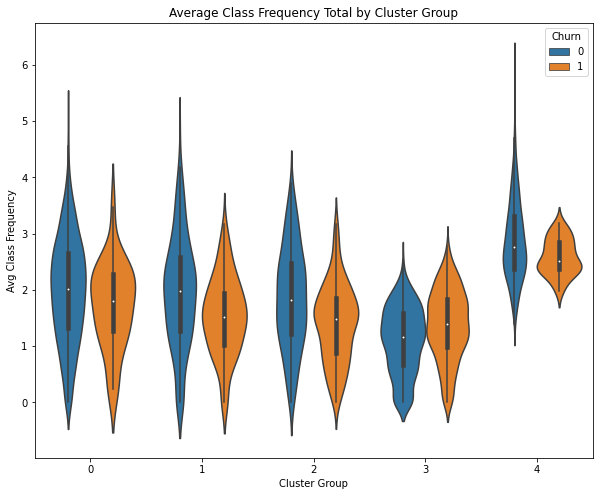

In [67]:
plt.figure(figsize=(10,8))
sns.violinplot(x='cluster_km', y='Avg_class_frequency_total', hue='Churn', data=churn_data)
plt.title('Average Class Frequency Total by Cluster Group')
plt.xlabel('Cluster Group')
plt.ylabel('Avg Class Frequency')
plt.show()

Users from cluster group 0 appear to have a slightly higher average class frequency compared to group 3. This could mean that users who user the gym more often are less likely to churn, which would make sense. Group 4 has the highest average class frequency, let's see what their churn rate is:

In [68]:
display(cluster_churn_rate)

cluster_km  Churn
0           0        0.972305
            1        0.027695
1           0        0.732468
            1        0.267532
2           0        0.556436
            1        0.443564
3           1        0.514263
            0        0.485737
4           0        0.931900
            1        0.068100
Name: Churn, dtype: float64

Group 4's churn rate is only about 6%, which confirms that active users are the least likely to churn. Advertising and encouraging users to attend work out classes could be an effective way of keeping the churn rate low.

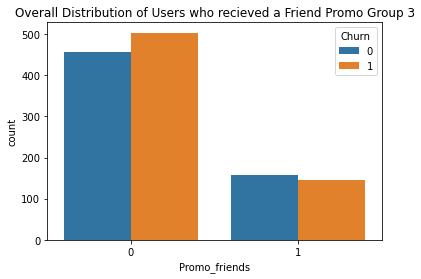

In [69]:
sns.countplot(x='Promo_friends', data=cluster_group3, hue='Churn')
plt.title('Overall Distribution of Users who recieved a Friend Promo Group 3')
plt.show()

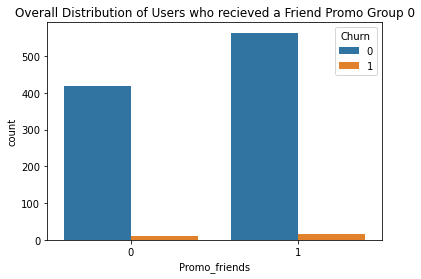

In [70]:
sns.countplot(x='Promo_friends', data=cluster_group0, hue='Churn')
plt.title('Overall Distribution of Users who recieved a Friend Promo Group 0')
plt.show()

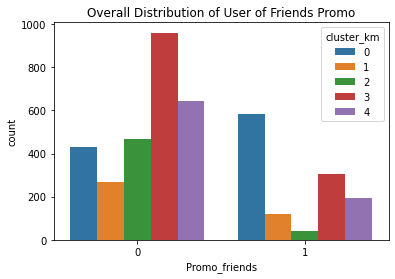

In [71]:
sns.countplot(x='Promo_friends', data=churn_data, hue='cluster_km')
plt.title('Overall Distribution of User of Friends Promo')
plt.show()

It appears that the friends promo was actually quite effective in attracting new users and in maintaining a lower churn frequency. I would encourage the gym to continue this promo going into the future. 

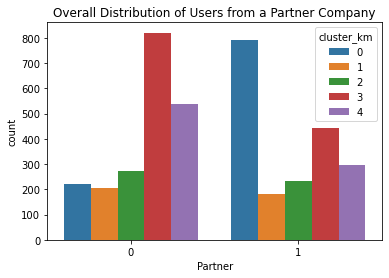

In [72]:
sns.countplot(x='Partner', data=churn_data, hue='cluster_km')
plt.title('Overall Distribution of Users from a Partner Company')
plt.show()

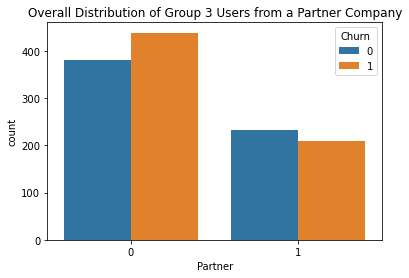

In [73]:
sns.countplot(x='Partner', data=cluster_group3, hue='Churn')
plt.title('Overall Distribution of Group 3 Users from a Partner Company')
plt.show()

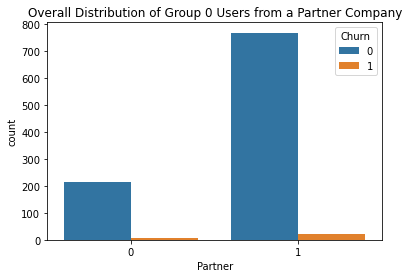

In [74]:
sns.countplot(x='Partner', data=cluster_group0, hue='Churn')
plt.title('Overall Distribution of Group 0 Users from a Partner Company')
plt.show()

Partner users appear to be more loyal to the gym compared to users who did not come from a partner company. I would encourage the gym to continue to market to users from partner companies.

<a id='Step 5. Come up with conclusions and basic recommendations on working with customers'><a/>

## Step 5. Come up with conclusions and basic recommendations on working with customers

Overall the following features appear to be the most important in regards to the churn rate for users at Model Fitness: Age, Lifetime and Contract Period, Friends Promo, Partner and lastly Class Frequency.

Conclusions based on the features: In regards to Age, users who are slighlty older appear to be the most loyal. I would recommend marketing to the 30-35 year old demographic. Based on the data, users in that age range are most likely to stay with the gym long term. For lifetime and contract period, the longer the better. Users who commit to long term, 6-12 month contacts are less likely to churn where as users who only commit to 1 month churn at a much higher rate. Users who came to the gym from a friends promo churn at a much lower rate compare to those who did not, and the same goes for users who came from a partner company. Lastly the two class frequency features also appeared to have an impact on the churn rate. The more classes users attended both monthly and weekly, the less likely they are to churn.

Conclusion based on models: Althugh both the Logisitic Regression and Random Tree Classifier metrics were good, the Logisitic Regression model had a clear edge across all the metrics and should therefore be used for the primary prediction model for future analysis.

Recommendations:

To begin, I would recommend marketing to 30-35 year old specifically, and possibly 28 and 29 year olds as well. This age group appeared to be the most loyal to the gym and least likely to churn. It should also be noted that they comprise a significant amount of the gym's current customer base. Younger people, especially below 25 are much more likely to churn and should therefore be marketed to less. 

In regards to the lifetime and contract period features,  I would recommend a marketing campaing that would expand the 12 month contract base. Perhaps Model Fitness could market a deal where if a user signs up for a 12 month membership then they get exclusive access to all the gym's services in the first 3 month of the contract, after which they can choose to pay more for those services or keep the base deal for the remainder of the contract period. This strategy would attract users to stay for a longer period of time. It would also help prevent them from leaving within the first 3 months, which is when users are most likely to churn across cluster groups. 

The friends promo is effective and should be maintained or even expanded. Users who came to the gym from a friends promo were much less likely to churn comapred to those who did not. 

Partner company members were also much less likely to churn. I would recommend that Model Fitness expand their promotions to partner companies.

Laslty in regards to class frequency, the more active users are in gym provided classes, the less likely they are to churn. So, I would recommend that Model Fitness expands their number of workout classes and promotes them further. Perhaps they could offer a discount to users who attend a certain amount of classes per week or month, that would attract users to go to the gym more often by giving them an incentive. The more classes users attend, the great the discount.

In conclusion, I believe that Model Fitness is in a very good position to cut their churn rate and expand the longevity of their user base if they take the necessary measures moving forward. 

<a href='#Top of Page'>Top of Page</a>